## Instructions {-}
Ce sujet est constitué de deux parties : la partie 1 correspond au sujet donné l'an dernier, dont la correction vous est donnée, la partie 2 constitue la partie qui sera évaluée et se place dans la continuité de la partie 1.

# Enoncé du problème (Partie 1)

L'objectif de ce projet est d'estimer la longueur de câble sous-marin nécessaire pour relier deux côtes $A$ et $B$  en utilisant des simulations conditionnelles.


Le câble reposera sur le fond marin dont la profondeur est inconnue.
Le segment $[AB]$ est discrétisé par une séquence de (N+1) points. On pose $x_0=A$ et pour $i=1,\dots,N$, $$x_i=x_0+i\Delta$$ où $$\Delta = \frac{AB}{N}$$ de telle sorte que $x_N=B$.
On note $z(x)$ la profondeur du fond marin au point $x$ de telle sorte 
qu'on pourra estimer la longueur totale de câble nécessaire par la somme 
des longueurs sur les segments de la discrétisation :

$$l=\sum_{i=1}^N\sqrt{\Delta^2+(z(x_i)-z(x_{i-1}))^2}.$$

Enfin, notons que l'on dispose d'un ensemble de $n$ observations de la 
profondeur que l'on supposera situées sur des points de discrétisation $z(x_{j_1}),\dots,z(x_{j_n})$.


On adopte un modèle probabiliste pour la profondeur. On suppose que le vecteur des 
profondeurs sur les points de discrétisation 
$\mathbf{z}=(z(x_0),\dots,z(x_N))$ est la réalisation
d'un vecteur aléatoire gaussien $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$ 
dont le vecteur d'espérance ne contient qu'une seule valeur $\mu$ 
répétée $N+1$ fois et dont la matrice de covariance $\Sigma$ a pour termes $\sigma_{ij}$
définis par $\sigma_{ij}=C(|x_i-x_j|)$ où $C$ est une
fonction décroissante, traduisant le fait que deux points 
géographiquement proches ont tendance à avoir des profondeurs plus similaires que deux points éloignés.

On supposera que la matrice de covariance ainsi 
générée est définie-positive (en fait, $C$ sera choisie parmi les fonctions qui, 
appliquées aux termes d'une matrice de distance, produisent des matrices définie-positives). 

Si on note $L$ la variable aléatoire donnant la longueur de cable nécessaire : 
$$L=\sum_{i=1}^N\sqrt{\Delta^2+(Z(x_i)-Z(x_{i-1}))^2},$$
un bon estimateur de $L$ est fourni par l'espérance conditionnelle 

$$L^\star=E[L|Z(x_{j_1})=z(x_{j_1}),\dots,Z(x_{j_n})=z(x_{j_n})].$$
                                                                              
Cependant, cette quantité est difficilement accessible par le calcul. 
On va donc avoir recours à des
simulations conditionnelles. C'est-à-dire que l'on va simuler 
un nombre $K$ de réalités (disons des réalisations du modèle 
probabiliste choisi), et sur chacune d'entre elle, 
la quantité de câble nécessaire sera évaluée. 
On disposera ainsi d'un échantillon $l_{(1)},\dots,l_{(K)}$ de 
longueures simulées. Puis on approchera l'espérance conditionnelle  par 
$$L^\star=\frac1{K}\sum_{k=1}^K l_{(k)}.$$

L'objectif de ce projet est donc d'écrire un code permettant 
d'effectuer cette simulation conditionnelle, puis de l'appliquer 
au jeu de données fourni et d'en déduire une estimation de la longueur de câble nécessaire.

## Questions théoriques

1. Quel théorème du cours nous autorise-t-il à estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles ?

*la loi forte des grands nombres, cf [Proba IV p.16](https://boisgera.github.io/CDIS/output/Probabilit%C3%A9%20IV.pdf), en vérifiant que $L$ est bien intégrable*

2. Rappeler la loi conditionnelle du vecteur des composantes de $\mathbf{Z}$ correspondant aux points de discrétisation
sans observation, connaissant les valeurs prises par les composantes aux sites d'observation.

*cf. [Proba III p.18](https://boisgera.github.io/CDIS/output/Probabilit%C3%A9%20III.pdf),*

3. Si $\mathbf{Y}=(Y_1,\dots,Y_p)$ est un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1, 
quelle est la loi du vecteur $\mathbf{Z}=m+R\mathbf{Y}$ où $R$ est une matrice $p\times p$ et $m$ est un vecteur de taille $p$ ?

*cf. [Proba V p.12](https://cloud.mines-paristech.fr/index.php/s/GLDwtTAMOJCYk3i/download)*

4. En déduire un algorithme de simulation conditionnelle.

*Appliquer l'algorithme de la q.3 à la loi conditionnelle (on calculera en particulier l'espérance conditionnelle de $\mathbf{Z}$ sachant les données et la décomposition de Cholesky de la matrice de covariance conditionnelle sachant les données).*

## Données du problème
Conventionnellement, $A$ est l'origine, $B=500$, $N=100$.

Les données $$\begin{array}{c|r}i & z(x_i)\\
\hline
0 & 0\\
20 & -4\\
40 & -12.8\\
60 & -1\\
80 & -6.5\\
100 & 0\end{array}$$

L'espérance de chaque composante du vecteur aléatoire $\mathbf{Z}$ est donnée par $\mu=-5.$

La fonction $C$ est définie par $$C(h)=\sigma^2 e^{-|h|/a},$$

où $|h|$ correspond à la distance entre deux points, $a=50$ et $\sigma^2=12$.


## Implémentation

### Préambule

In [1]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle

mu=-5
a = 50
sigma2 = 12

#Données

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


### Questions

1. Ecrire une fonction qui prend en argument la distance entre les points, le paramètre $a$, et le paramètre $\sigma^2$, et qui retourne la covariance entre deux points.
On pourra fournir une matrice de distance à cette fonction. Dans ce cas, la fonction renverra la matrice de covariance.

In [2]:
#Fonction C

def Covexp(dist,rangeval,sigmaval):
    return sigmaval * np.exp(-dist/rangeval)


2. Calculer la matrice de distance.

In [3]:
distmat=abs(np.subtract.outer(discretization,discretization))

3. Calculer la matrice de covariance du vecteur $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$.

In [4]:
Sigma=Covexp(distmat,a,sigma2)

4. Extraire les 3 matrices de covariance suivantes :

 * entre les observations

 * entre les observations et les inconnues

 * entre les inconnues


In [5]:
SigmaObs = Sigma[observation_indexes,:][:,observation_indexes]
SigmaObsUnknown = Sigma[observation_indexes,:][:,unknown_indexes]
SigmaUnknown = Sigma[unknown_indexes,:][:,unknown_indexes]

5. Calculer l'espérance conditionnelle des composantes non observées connaissant les observations et la représenter avec les données.

In [6]:
invSigma = np.linalg.inv(SigmaObs) 
Ec= mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))


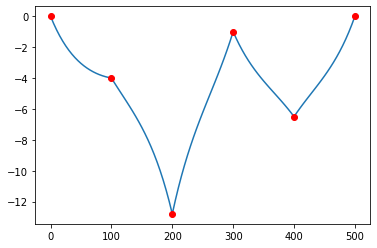

In [7]:
allval1 = np.zeros(N)
allval1[unknown_indexes]=Ec
allval1[observation_indexes]=depth
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

6. Calculer la matrice de variance conditionnelle et tracer sa diagonale (variance conditionnelle) en fonction de la position. Commenter.

In [8]:
SigmaCond = SigmaUnknown - np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),SigmaObsUnknown))

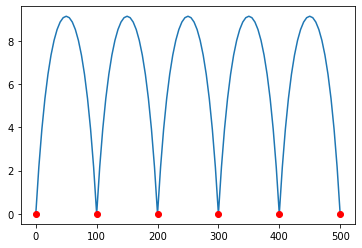

In [9]:
allval2 = np.zeros(N)
allval2[unknown_indexes]=np.diag(SigmaCond)
plt.plot(discretization,allval2)
plt.plot(discretization[observation_indexes], np.zeros(np.shape(observation_indexes)[0]), 'ro')
plt.show()

*On voit ici que la variance est nulle aux points de données (puisque la valeur est fixée) puis qu'elle augmente lorsqu'on s'éloigne des données*

7. Effectuer une simulation conditionnelle. Sur un même graphique, tracer la simulation ainsi que les données et l'espérance conditionnelle. Commenter.

In [10]:
Cholesky = np.linalg.cholesky(SigmaCond)
x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu = Ec + np.matmul(Cholesky,x)

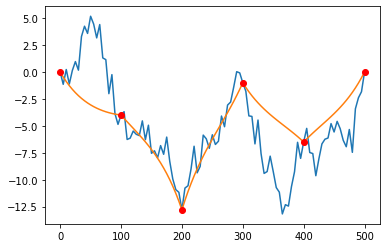

In [11]:
allval3 = np.zeros(N)
allval3[unknown_indexes]=simu
allval3[observation_indexes]=depth
plt.plot(discretization,allval3)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

*l'espérance conditionnelle est lisse car c'est la fonction des données qui minimise la variance ; la simulation conditionnelle reproduit les fluctuations du modèle et donc l'aspect du fond marin*

8. Ecrire une fonction qui calcule la longueur du câble en fonction du vecteur des profondeurs et du pas de discrétisation.

In [12]:
def length(z,delta):
    return sum(np.sqrt(Delta**2+(z[1:N]-z[0:-1])**2))

9. Utiliser cette fonction pour calculer la longueur du câble à partir de 100 simulations. Comparer l'espérance conditionnelle (estimée) de la longueur avec la longueur de l'espérance conditionnelle.

In [13]:
K=100000
result = np.zeros(K)
for i in range(K):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    result[i]=length(allval3,Delta)


In [44]:
moy = sum(result)/K
moy

522.4379084526676

In [15]:
length(allval1,Delta)

501.6468416918411

*On donne ici directement les résultats pour 100000 simulations (comparer la vitesse d'éxécution avec votre code pour voir l'intérêt de la vectorisation).*

*On voit ici que la longueur donnée par l'espérance conditionnelle est bien moindre que la longueur d'une simulation conditionnelle. Ceci est dû au fait que la simulation conditionnelle va reproduire les fluctuations attendues, au contraire de l'espérance conditionnelle qui minimise la variance.*

*NB : On remarquera que c'est le seul endroit où on a utilisé une boucle dans cette correction. On aurait pu s'en passer en utilisant notamment les outils de la librairie Pandas mais le code est plus lisible ainsi.*

10. Représenter la suite $M_n$ des moyennes des longueurs de câbles en fonction du nombre de simulations. Commenter.

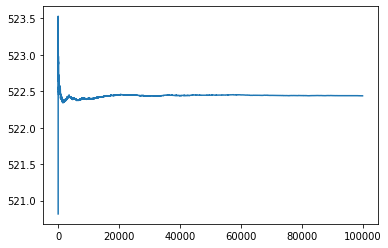

In [16]:
indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result)/indice_simu)
plt.show()

*Comme attendu d'après la LFGN, on observe une stabilisation de la valeur moyenne. Les variations sont imperceptibles après quelques dizaines de milliers de simulations*

11. Représenter l'histogramme des longueurs de câbles générées.

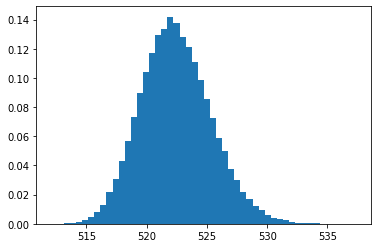

In [17]:
plt.hist(result,50,density=True)
plt.show()

*L'histogramme ressemble à une densité gaussienne, avec néanmoins une légère dissymétrie (plus de valeurs fortes).*

12. Donner un intervalle de confiance à 95% de la longueur du câble par 2 méthodes différentes. Commenter.

*1ère méthode : par approximation gaussienne. L'histogramme précédent suggère qu'une loi gaussienne peut bien représenter la loi conditionnelle de la longueur du cable. On obtient un intervalle de confiance en calculant la moyenne (milieu de l'intervalle) et l'écart type de l'échantillon de longueurs de câble puis en appliquant la formule du cours.*

In [18]:
Ln = sum(result)/K
sigman = np.std(result)
[Ln - sigman*1.96,Ln + sigman*1.96]

[516.7422676810176, 528.1335492243176]

*2e méthode : on extrait les quantiles à 2.5% et 97.5% de l'échantillon, c'est-à-dire les valeurs $x_\alpha$ pour $\alpha \in \{0.025 ; 0.975\}$telles que* $$\mathbb{P}(L<x_\alpha) \approx \frac{1}{n}\sum_{i=1}^N 1_{\{L_i<x_\alpha\}}$$

In [19]:
np.quantile(result,[0.025,0.975])

array([517.11889903, 528.50660045])

*ATTENTION : ici l'utilisation du TCL tel qu'exposé au début du chapitre 5 fournissait un intervalle de confiance de l'**espérance de la longueur de câble** et non de la **longueur de câble** (erreur fréquente).*

*On voit par ailleurs que la 2e méthode est plus précise car elle est basée directement sur la loi empirique de l'échantillon*

13. Donner une estimation de la probabilité que la longueur du câble dépasse 525 m.

In [20]:
np.mean(result>525)

0.18614

14. Reprendre les questions précédentes avec 1000, 10000 puis 100000 simulations. Commenter

*cf. le commentaire de la question 10. On observe une stabilisation progressive des estimateurs des différentes quantités calculées : moyennes, quantiles, probabilité de dépassement de seuil.*

# Enoncé 2021 (Partie 2)

Nous nous plaçons dans le même cadre que ci-dessus. Nous tenons pour acquis les résultats précédents et allons maintenant approfondir l'analyse.

## Valeurs positives

1. A la question 7 de la partie 1, on peut s'apercevoir que certains profils de profondeur présentent des valeurs positives, ce qui n'a pas de sens si on considère qu'il n'y a pas de partie émergée entre les deux côtes. Proposer et implémenter un algorithme de type rejet qui ne génèrera que des valeurs négatives. Représenter un profil de profondeur généré.

In [21]:
#méthode 1
cholesky = np.linalg.cholesky(SigmaCond)
p = len(unknown_indexes)
y = np.random.normal(0,1,p)
a = Ec + np.dot(cholesky,y)
while np.any(a>=0): #on souhaite que toutes nos valeurs soient positives
    y= np.random.normal(0,1,p)
    a = Ec + np.dot(cholesky,y)
simu1 = a

In [22]:
#méthode 2
cholesky = np.linalg.cholesky(SigmaCond)
p = len(unknown_indexes)
y = np.random.normal(0,1,p)
a = Ec + np.dot(cholesky,y)
while np.any(a>=0): #on souhaite que toutes nos valeurs soient positives
    errones = np.sum(a>=0)
    x = np.random.normal(0,1,errones)
    y[a>=0]= x
    a = Ec + np.dot(cholesky,y)
simu2 = a

Nous pouvons en effet effectuer la méthode de rejet de deux faucons différentes : dans la première méthode si notre vecteur y gaussien contient des valeurs positifs alors on régénère un autre vecteur gaussien en entier jusqu'a ce que le vecteur généré ait toutes ses valeurs négatives. Toutefois cette méthode risque de nous donner un taux de rejet très grand (de l'ordre de 95%).Une autre méthode s'offre donc à nous : après avoir générer un vecteur y gaussien qui contiendrait des valeurs positifs au lieu de régénérer un vecteur gaussien de taille p on ne régénère qu'un vecteur gaussien de taille le nombre d'éléments positifs de y afin de les remplacer dans y. On retrouve alors un vecteur gaussien a valeurs négatives mais avec un taux de rejet qui est plus faible.On décide alors de poursuivre cette question avec la méthode 2

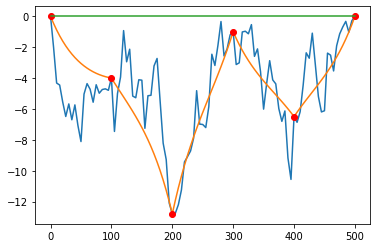

In [23]:
allval4 = np.zeros(N)
allval4[unknown_indexes]=simu2
allval4[observation_indexes]=depth
plt.plot(discretization,allval4)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.plot(discretization,np.zeros(len(discretization))) #pour verifier que les valeurs sont <0
plt.show()

2. L'emploi de cet algorithme a-t-il un impact sur la valeur moyenne de la longueur de câble ? Sur l'histogramme des longueurs de câble ? Sur l'intervalle de confiance obtenu par la méthode des quantiles ? Sur la probabilité de dépassement du seuil de 525 m? Donner une estimation du taux de rejet de l'algorithme. Considérer 10000 simulations.

In [24]:
K=10000
result1 = np.zeros(K)
result2 = np.zeros(K)
S=0
for i in range(K):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    a=Ec + np.matmul(Cholesky,x)
    allval3[unknown_indexes]=a
    S+=1
    while np.any(a>=0): #on souhaite que toutes nos valeurs soient positives
        S+=1
        errones = np.sum(a>=0)
        y = np.random.normal(0,1,errones)
        x[a>=0]=y
        a = Ec + np.dot(cholesky,x)
    allval4[unknown_indexes]=a
    result1[i]=length(allval3,Delta)
    result2[i]=length(allval4,Delta)

In [25]:
#impact sur la valeur moyenne de la longueur du cable:
(sum(result1)-sum(result2))/K
sum(result1)/K

522.4742887414524

La différence entre les deux valeurs moyennes est de l'ordre de 0.6m (moins de 0,12% de la longueur du cable)on peut donc considerer que la méthode du rejet n'affecte pas vraiment la valeur moyenne de la longueur du câble.

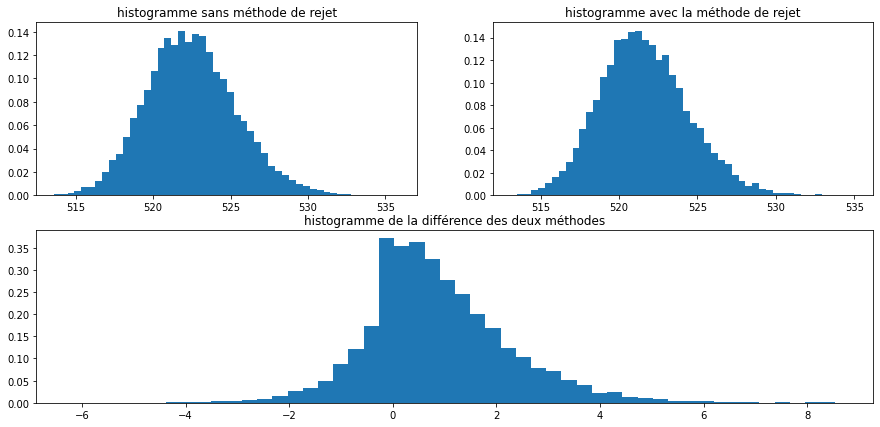

In [26]:
#impact sur l'histogramme des longueurs du câble:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(2,2,1)
ax1.hist(result1,50,density=True)
ax1.set_title("histogramme sans méthode de rejet")
ax2 = plt.subplot(2,2,2)
ax2.hist(result2,50,density=True)
ax2.set_title("histogramme avec la méthode de rejet")
ax3 = plt.subplot(2,1,2)
ax3.hist(result1-result2,50,density=True)
ax3.set_title("histogramme de la différence des deux méthodes");

On remarque que les deux premiers histogrammes représentant respectivement l'histogramme des longueurs de cable généré sans et avec la méthode de rejet ont la même allure mais quelques différences persistent. La difference des deux histogramme montre bien qu'une grande partie des valeurs sont semblables toutefois certaines valeurs different. Il y a donc bien un impact

In [27]:
#impact sur l'intrervalle de confiance par la méthode des quantiles
a1=np.quantile(result1,[0.025,0.975])
a2=np.quantile(result2,[0.025,0.975])
print(a1,a2)

[517.20880508 528.5863787 ] [516.52392348 527.50719566]


L'intervalle de confiance est quasi inchangée (moins de 1m que ce soit pour le quantile superieur ou inférieur). Il n'est donc quasi pas impacté.On peut toutefois déterminer un bon intervalle de confiance en faisant l'intersection des deux intervalles

In [28]:
#impact sur la probabilité de dépassement de 525m
t1=np.mean(result1>525)
t2=np.mean(result2>525)
print(t1,t2,abs(t1-t2))

0.1842 0.1185 0.06570000000000001


La différence entre les probabilités de dépassement est de l'ordre de 26% $\frac{\lvert t_1-t_2\rvert}{t_1} \simeq 0.26$ entre les deux méthodes (erreur relative entre les deux resultats). La méthode de rejet impacte donc bien le taux de dépassement.

In [29]:
#Estimation du taux de rejet:
1-K/S

0.6636959811669749

Le taux de rejet est de l'ordre de 0.65 (alors que si on avait gardé la 1ère méthode on aurait eu un taux de rejet de l'ordre de 0.95)

## Approche Bayésienne

Dans la première partie, on a considéré que l'ensemble des paramètres du modèle était parfaitement connu. Toutes choses égales par ailleurs, on va maintenant considérer que la moyenne $\mu$ est issue d'une estimation entâchée d'une incertitude. Plus précisément, on va modéliser cette incertitude en considérant que $\mu \sim \mathcal{N}(-5,4)$.

On va également décomposer le vecteur $\mathbf{Z}$ en $\mathbf{Z} = (\mathbf{Z}_{\text{OBS}},\mathbf{Z}_{\text{UNK}})$. On notera $C_{\text{OBS}}$ et $C_{\text{UNK}}$ les matrices de covariance respectives de $\mathbf{Z}_{\text{OBS}}$ et $\mathbf{Z}_{\text{UNK}}$ ainsi que $C_{\text{OBS},\text{UNK}}$ la matrice des covariances entre ces deux vecteurs.

### Questions théoriques

3. Montrer que $\mu | \mathbf{Z}_{\text{OBS}}= \mathbf{z}_{\text{OBS}} \sim \mathcal{N}(\widehat{\mu},\widehat{\sigma}^2)$ avec
$$\widehat{\sigma}^2 = (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{1} + \frac1{4})^{-1},$$ 
où $\mathbf{1}$ est un vecteur de longueur 6 (soit la longueur du vecteur $\mathbf{Z}_{\text{OBS}}$) ne contenant que des 1 et 
$$\widehat{\mu} = \widehat{\sigma}^2 (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{z}_{\text{OBS}} - \frac{5}{4} )$$
Indication : écrire la densité jointe du vecteur $(\mathbf{Z}_{\text{OBS}},\mu)$, calculer $-2 \ln$ de cette densité puis identifier la forme quadratique faisant intervenir $\mu$.

On suppose que $\mu \sim \mathcal{N}(-5,4)$ donc $f_{\mu}(m) = \frac{1}{2\sqrt{2\pi}}e^{-\frac{(m + 5)^2}{8}}$ et $ \mathbf{Z}_{\text{OBS}}|\mu=m \sim \mathcal{N}(m.\mathbf{1},\mathbf{C}_{\text{OBS}})$ donc $f_{\mathbf{Z}_{\text{OBS}}|\mu=m} (\mathbf{z}_{\text{OBS}}) = \frac{1}{(2\pi)^{3}\sqrt{det(\mathbf{C}_{\text{OBS}})}}e^{-\frac{1}{2}(\mathbf{z}_{\text{OBS}} - m\mathbf{1})^t C_{\text{OBS}}^{-1} (\mathbf{z}_{\text{OBS}} - m\mathbf{1})}$.


La densité jointe s'écrit donc :

$f_{\mu, \mathbf{z}_{\text{OBS}}} (m, \mathbf{z}_{\text{OBS}}) = f_{\mu}(m).f_{\mathbf{Z}_{\text{OBS}}|\mu=m} (\mathbf{z}_{\text{OBS}})=\frac{1}{(2\pi)^{\frac{7}{2}}\sqrt{det(\mathbf{C}_{\text{OBS}})}}e^{-\frac{1}{2}(\mathbf{z}_{\text{OBS}} - m\mathbf{1})^t C_{\text{OBS}}^{-1} (\mathbf{z}_{\text{OBS}} - m\mathbf{1}) -\frac{(m + 5)^2}{8}}$.

On obtient donc :

$-2\ln{(f_{\mu, \mathbf{z}_{\text{OBS}}} (m, \mathbf{z}_{\text{OBS}}))} = 2\ln{((2\pi)^{\frac{7}{2}}\sqrt{det(\mathbf{C}_{\text{OBS}})})} + \frac{(m + 5)^2}{4} + (\mathbf{z}_{\text{OBS}} - m\mathbf{1})^t C_{\text{OBS}}^{-1} (\mathbf{z}_{\text{OBS}} - m\mathbf{1})$ (équation $(1)$)

Or on sait que $\mu | \mathbf{Z}_{\text{OBS}}= \mathbf{z}_{\text{OBS}} \sim \mathcal{N}(\widehat{\mu},\widehat{\sigma}^2)$ ($\mu$ suit une loi normale),

Donc $f_{\mu, \mathbf{z}_{\text{OBS}}} (m, \mathbf{z}_{\text{OBS}}) = f_{ \mathbf{Z}_{\text{OBS}}} (\mathbf{z}_{\text{OBS}}) f_{\mu | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(m)$

D'où $-2\ln{(f_{\mu, \mathbf{z}_{\text{OBS}}} (m, \mathbf{z}_{\text{OBS}}))} = -2\ln{(f_{ \mathbf{z}_{\text{OBS}}} (\mathbf{z}_{\text{OBS}}))} -2\ln{(f_{\mu | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(m))}$ avec $f_{\mu | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(m) = \frac{1}{\sqrt{2\pi} \widehat{\sigma}^2}e^{-\frac{(m - \widehat{\mu})^2}{2\widehat{\sigma}^2}}$

On obtient donc $-2\ln{(f_{\mu, \mathbf{z}_{\text{OBS}}} (m, \mathbf{z}_{\text{OBS}}))} = \frac{m^2}{\widehat{\sigma}^2} - \frac{2m\widehat{\mu}}{\widehat{\sigma}^2} + c' $ où c' est indépendant de m.

En écrivant l'équation $(1)$ sous cette forme on trouve:  $-2\ln{(f_{\mu, \mathbf{z}_{\text{OBS}}} (m, \mathbf{z}_{\text{OBS}}))} = \frac{m^2}{4}+\frac{10.m}{4}+(\mathbf{1}^t.C_{\text{OBS}}^{-1}.\mathbf{1}).m^2 -2.m.(\frac{-5}{4}+\mathbf{1}^t.C_{\text{OBS}}^{-1}.\mathbf{z}_{\text{OBS}})+c'$ avec $c'$ indépendant de m.

Il vient par identification $\widehat{\sigma}^2 = (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{1} + \frac1{4})^{-1}$ et $\widehat{\mu} = \widehat{\sigma}^2 (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{z}_{\text{OBS}} - \frac{5}{4} )$.

4. Montrer que si $X$, $Y$ et $Z$ sont trois vecteurs aléatoires à densité, alors $f_{X,Y|Z = z}(x,y) = f_{X|Y=y,Z=z}(x)f_{Y|Z=Z}(y)$

On a: $ f_{X,Y|Z = z}(x,y) = \frac{f_{X,Y,Z}(x,y,z)}{f_{Z}(z)} =  \frac{f_{Z}(z)f_{Y|Z = z}(y)f_{X|Y = y, Z = z}(x)}{f_{Z}(z)}$.

Ainsi, $f_{X,Y|Z = z}(x,y) = f_{X|Y=y,Z=z}(x)f_{Y|Z=Z}(y)$

5. En déduire que la densité de $(\mathbf{Z}_{\text{UNK}},\mu) | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$ s'écrit comme le produit de $f_{\mu | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ et de $f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ que l'on exprimera.

    Indication : $f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ est identique à la densité $f_{\mathbf{Z}_{\text{UNK}}| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ utilisée dans la partie 1 avec $\mu = \mu^\star$

D'après la question 4, en posant $X = \mathbf{Z}_{\text{UNK}}, Y = \mu$ et $Z = \mathbf{Z}_{\text{OBS}}$, on a :

$f_{\mathbf{Z}_{\text{UNK}}, \mu |\mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}} (z, \mu^*) = f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^*, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(z). f_{\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(\mu^*)$;

$ f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^*, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(z) = \mathbf{z}_{\text{OBS}} (z, \mu^*) = \frac{1}{(2\pi)^{\frac{95}{2}}\sqrt{det(\mathbf{CS}_{\text{UNK}})}}$$e^{-\frac{1}{2}(z - \Psi(\mathbf{z}_{\text{OBS}})^t CS_{\text{UNK}}^{-1} (z - \Psi(\mathbf{z}_{\text{OBS}}))}$, 

avec $CS_{\text{UNK}} = C_{\text{UNK}} - C_{\text{UNK, OBS}}.C_{\text{OBS}}^{-1}.C_{\text{OBS,UNK}}$

et $\Psi (\mathbf{z}_{\text{OBS}}) = \mu^*.\mathbf{1_{95}} + C_{\text{UNK, OBS}}.C_{\text{OBS}}^{-1}.(\mathbf{z}_{\text{OBS}} -\mu^* \mathbf{1_{6}})$ où $\mathbf{1_{95}}$ est un vecteur de longueur 95 (soit la longueur du vecteur $\mathbf{Z}_{\text{UNK}}$) ne contenant que des 1 et $\mathbf{1_{6}}$ est un vecteur de longueur 6 (soit la longueur du vecteur $\mathbf{Z}_{\text{OBS}}$) ne contenant que des 1 .



### Simulation

On va maintenant chercher à simuler les valeurs de $\mathbf{Z}_{\text{UNK}}$ en tenant compte de l'incertitude sur $\mu$.

En première approche, on pourrait chercher à obtenir la densité de $\mathbf{Z}_{\text{UNK}} | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$ en calculant 
$$\int_\mathbb{R} f_{(\mathbf{Z}_{\text{UNK}},\mu) | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(\mathbf{z}_{\text{UNK}},\mu^\star) d\mu^\star$$
mais ce calcul a peu de chances d'aboutir.

On va plutôt procéder par simulations en cascade, c'est-à-dire que pour chaque simulation de $\mathbf{Z}_{\text{UNK}}$, on va d'abord générer une valeur $\mu^\star$ de $\mu$ selon $f_{\mu | \mathbf{Z}_{\text{OBS}}= \mathbf{z}_{\text{OBS}}}$ puis on simulera $\mathbf{Z}_{\text{UNK}}$ selon $f_{\mathbf{Z}_{\text{UNK}}| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}},\mu = \mu^\star}$.


6. Calculer $\widehat{\mu}$ et $\widehat{\sigma}^2$. 

In [30]:
#en utilisant les formules obtenues en 3 on simule sigma_chapeau2 et mu_chapeau
sigma_chapeau2 = float((np.dot(np.ones((1,6)),np.dot(np.linalg.inv(SigmaObs),np.ones((6,1))))+1/4)**(-1))
mu_chapeau = float(sigma_chapeau2*(np.dot(np.ones((1,6)),np.dot(np.linalg.inv(SigmaObs),depth))-5/4))

In [31]:
sigma_chapeau2,mu_chapeau

(1.5368909974762894, -4.291350330933772)

7. Calculer la probabilité de $\{\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}} > 0\}$. Proposer et implémenter un algorithme de simulation de $\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}, \mu <0$.

Pour calculer la probabilité de $\{\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}} > 0\}$ on décide d'utiliser l'intégrale de Monte-Carlo.En effet on connait la densité de $\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$ toutefois calculer l'intégrale de la densité entre 0 et $+\infty$ est délicat. On pose alors h la fonction indicatrice de ]0,$+\infty$[.
On pose alors $M_n(h) = \sum_{i=1}^{n} (h(X_i)$ avec $X_i =\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$. Ona a donc $M_n(h)\rightarrow \int h(x).P_X(dx)=E(h(X))=P(\{\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}} > 0\} $ presque surement.

In [32]:
import scipy.stats as sps
Mn = 0
n = 100000 #on a besoin de n qui tende vers +infini
A = np.random.normal(mu_chapeau,np.sqrt(sigma_chapeau2),n)#simulation de mu sachant Zobs=zobs
            #(en utilisant la question 3 on sait que c'est une loi normale)
for i in A: # on prend les valeurs de cette loi 
    if i>0: #si c'est positif on ajoute a Mn 1/N
        Mn += 1/n
Mn

0.00021

La probabilité de l'événement $\{\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}} > 0\}$ est donc de l'ordre de $2.10^{-4}$. Elle est donc négligeable

In [33]:
#simulation de mu sachant Zobs=zobs en ne gardant que les mu <0
def simu_mu_cond():
    x = np.random.normal(mu_chapeau,np.sqrt(sigma_chapeau2))
    while x>=0:
        x = np.random.normal(mu_chapeau,np.sqrt(sigma_chapeau2))
    return x

8. Générer un couple $\mathbf{Z}_{\text{UNK}}, \mu| \mathbf{Z}_{\text{OBS}}, \mu <0$ et représenter le profil de profondeur obtenu. On prendra soin de ne générer que des valeurs négatives de $\mathbf{Z}_{\text{UNK}}$ en utilisant l'algorithme de la section précédente.

Encore une fois nous pouvons utiliser l'une des deux méthodes implémentées dans la question 1.Pour comparer les resultats avec ceux obtenus à cette dernière nous choisissons de garder l'utilisation de la 2ème méthode.

In [51]:
# generation de mu sachant Zobs
mu_ch = simu_mu_cond()
# generation de Zunk sachant que mu = mu_ch et Zobs=zobs ceci revient à refaire ce qu'on a fait en 1ère partie en
#remplaçant mu par mu_ch et en ne gardant que les valeurs negatives
#on commence par redefinir Ec pour mu = mu_ch 
invSigma = np.linalg.inv(SigmaObs) 
Ec= mu_ch+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu_ch))
SigmaCond = SigmaUnknown - np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),SigmaObsUnknown))
Cholesky = np.linalg.cholesky(SigmaCond)

#on réitère la question 1
p = len(unknown_indexes)
y = np.random.normal(0,1,p)
a = Ec + np.dot(cholesky,y)
while np.any(a>=0): #on souhaite que toutes nos valeurs soient positives
    errones = np.sum(a>=0)
    x = np.random.normal(0,1,errones)
    y[a>=0]= x
    a = Ec + np.dot(cholesky,y)
simu2 = a

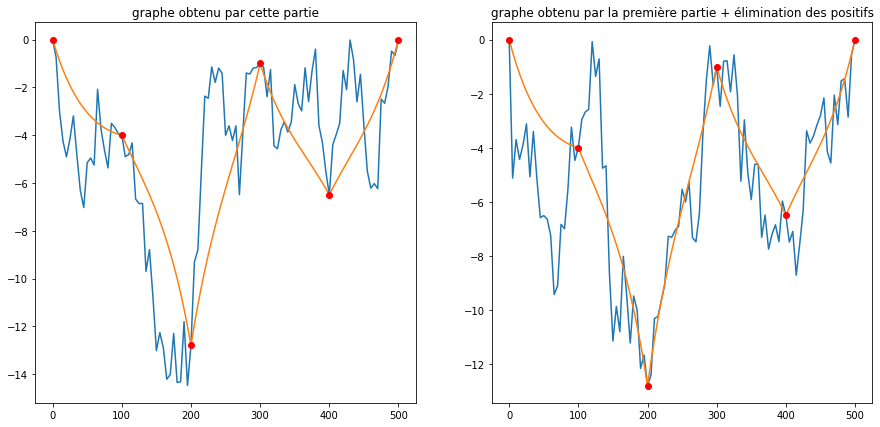

In [52]:
#generation du profil de profondeur obtenu
allval_1 = np.zeros(N)
allval_1[unknown_indexes]=simu2
allval_1[observation_indexes]=depth
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
ax1.plot(discretization,allval_1)
ax1.plot(discretization,allval1)
ax1.plot(discretization[observation_indexes], depth, 'ro')
ax1.set_title("graphe obtenu par cette partie")
ax2 = plt.subplot(1,2,2)
ax2.plot(discretization,allval4)
ax2.plot(discretization,allval1)
ax2.plot(discretization[observation_indexes], depth, 'ro')
ax2.set_title("graphe obtenu par la première partie + élimination des positifs")
plt.show()

9. Générer 10000 profils de profondeur et calculer les longueurs de câble associées. Comparer la valeur moyenne de la longueur de câble, dont on visualisera la convergence, l'histogramme des longueurs de câble, l'intervalle de confiance obtenu par la méthode des quantiles, la probabilité de dépassement du seuil de 525 m avec les résultats obtenus précédemment. Commenter.

In [47]:
K=10000
result_1 =  np.zeros(K)
for i in range(K):
    mu_ch = simu_mu_cond()
    Ec= mu_ch+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu_ch))
    p = len(unknown_indexes)
    y = np.random.normal(0,1,p)
    a = Ec + np.dot(cholesky,y)
    while np.any(a>=0): #on souhaite que toutes nos valeurs soient positives
        errones = np.sum(a>=0)
        x = np.random.normal(0,1,errones)
        y[a>=0]= x
        a = Ec + np.dot(cholesky,y)
    allval_1[unknown_indexes]=a
    result_1[i]=length(allval_1,Delta)

In [48]:
print(f"la longueur du câble d'après la partie 1 est {moy} et sa longueur d'après cette partie est {sum(result_1)/K}")

la longueur du cable d'après la partie 1 est 522.4379084526676 et sa longueur d'après cette partie est 521.5629670858375


La longueur du câble est donc quasi similaire à celle obtenue à la première partie avec une légère différence (encore une fois moins de 0,2%) . Il n'y a donc pas d'impact 'remarquable' entre les deux moyennes mais un petit écart.

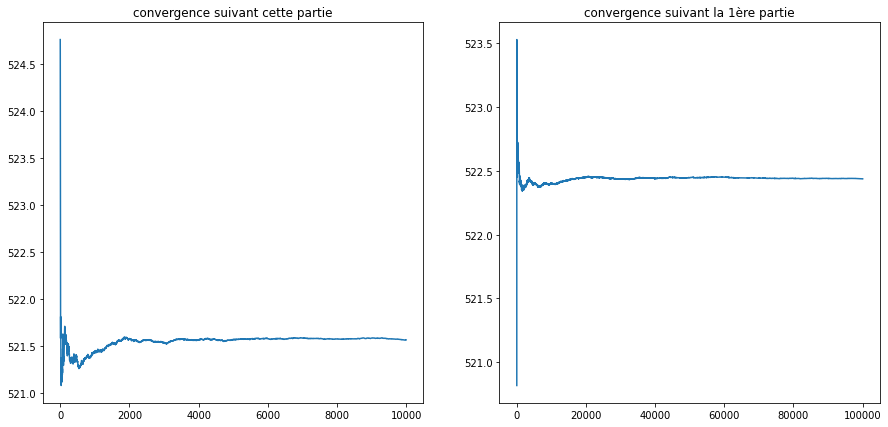

In [56]:
#convergence de la valeur moyenne de la longueur du câble:
plt.figure(figsize=(15,7))
indice_simu = 1+np.arange(K)
ax1 = plt.subplot(1,2,1)
ax1.plot(indice_simu,np.cumsum(result_1)/indice_simu)
ax1.set_title("convergence suivant cette partie")
indice_simu = 1+np.arange(10*K)
ax2 = plt.subplot(1,2,2)
ax2.plot(indice_simu,np.cumsum(result)/indice_simu)
ax2.set_title("convergence suivant la 1ère partie")
plt.show()

Comme attendu d'après la LFGN, on observe une stabilisation de la valeur moyenne. Les variations sont imperceptibles après quelques milliers de simulation

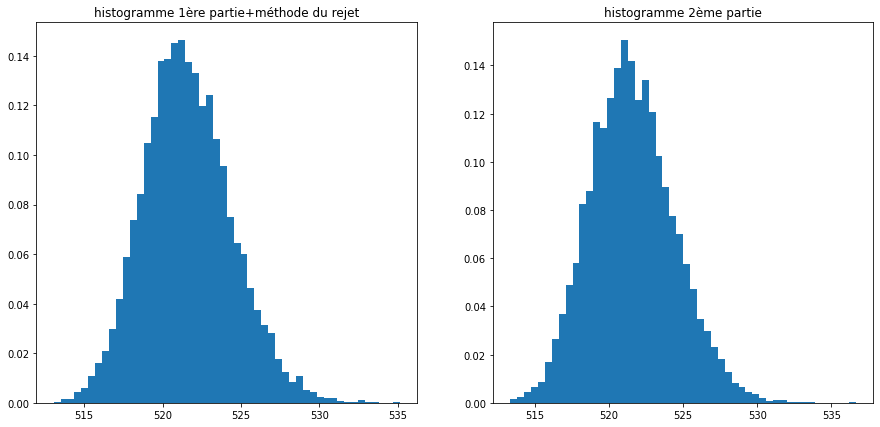

In [70]:
#histogramme des longueurs du câble:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
ax1.hist(result2,50,density=True)
ax1.set_title("histogramme 1ère partie+méthode du rejet")
ax2 = plt.subplot(1,2,2)
ax2.hist(result_1,50,density=True)
ax2.set_title("histogramme 2ème partie");

On retrouve bien des histogrammes avec la même allure mais avec de petites différences entre l'histogramme issu de la première partie en y appliquant la méthode du rejet et celui issu de cette partie (dues aux imprécisions et au fait qu'on ait choisis de modeliser $\mu$ suivant une loi normale).

In [62]:
#impact sur l'intrervalle de confiance par la méthode des quantiles
a1=np.quantile(result1,[0.025,0.975])
a2=np.quantile(result2,[0.025,0.975])
a3=np.quantile(result_1,[0.025,0.975])
print(f"l'intervalle de confiance de la partie 1 est {a1} et en utilisant la méthode de rejet uniquement il devient {a2}.Le nouvel intervalle de confiance est {a3}")

l'intervalle de confiance de la partie 1 est [517.20880508 528.5863787 ] et en utilisant la méthode de rejet uniquement il devient [516.52392348 527.50719566].Le nouvel intervalle de confiance est [516.38013347 527.48555311]


Encore une fois on remarque que les deux intervalles de la première partie et de cette partie sont proches mais présentent quelques différences .Toutefois entre l'intervalle de confiance issu de la partie 1 en utilisant la méthode de rejet et celui issu de cette partie il n'y a quasi pas de difference on peut même les considérer comme identiques

In [63]:
#impact sur la probabilité de dépassement de 525m
t1=np.mean(result1>525)
t2=np.mean(result2>525)
t3=np.mean(result_1>525)
print(f"la probabilité de dépassement de la partie 1 est {t1} et en utilisant la méthode de rejet uniquement elle devient {t2}.La nouvelle probabilité de dépassement est {t3}")

le taux de dépassement de la partie 1 est 0.1842 et en utilisant la méthode de rejet uniquement il devient 0.1185.Le nouveau taux de dépassement est 0.1184


On remarque encore une fois que le taux depassement avec la méthode de rejet est assez différent comme on a pu le constate à la question 2. Toutefois le taux de dépassement issu de la partie 1 en appliquant la méthode de rejet et par cette partie est identique.Il est bien consérvé malgré les incertitudes sur $\mu$

10. Qu'adviendrait-il selon vous si on rendait également aléatoires les autres paramètres du modèle $\sigma^2$ et $a$ ?

On a remarqué lors de la question précédente que rendre $\mu$ aléatoire a permis d'affiner la longueur du cable souhaité en changeant l'histogramme des longueurs du cable sans pour autant impacter la probabilité de dépassement et les intervalles de confiance. Toutefois considérer $\mu$ aléatoire est plus proche de la réalité.Par suite rendre aléatoires les autres paramètres du modèle affinera surement encore plus la longueur moyenne du cable et changera probablement l'histogramme des longueurs des câbles.

11. (facultatif) On suppose désormais que $\alpha = \frac1{\sigma^2} \sim \Gamma(a_1,a_2)$, où $\sigma^2$ correspond au paramètre qui intervient dans la fonction $C$. Donner l'expression de la densité de $\alpha | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$,  de $\mu | \alpha, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}},$ et de $\mathbf{Z}_{\text{UNK}} | \mu, \alpha, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$. Proposer un algorithme de simulation tenant compte de l'incertitude sur le paramètre $\alpha$ et analyser son impact sur les différentes quantités évaluées.

    Indication : Pour identifier la densité de $\alpha | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$, exprimer d'abord la densité jointe de $(\alpha,\mu, \mathbf{Z}_{\text{OBS}})$ puis marginaliser pour obtenir la densité de $(\alpha,\mathbf{Z}_{\text{OBS}})$
